# Importing libraries

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.image import imread

# Importing Dataset

In [41]:
dataset = pd.read_csv('out.csv')
print(dataset)

                    image label
0     nimg/img001-001.png     0
1     nimg/img001-002.png     0
2     nimg/img001-003.png     0
3     nimg/img001-004.png     0
4     nimg/img001-005.png     0
...                   ...   ...
3405  nimg/img062-051.png     z
3406  nimg/img062-052.png     z
3407  nimg/img062-053.png     z
3408  nimg/img062-054.png     z
3409  nimg/img062-055.png     z

[3410 rows x 2 columns]


# Importing images from dataset

In [42]:
from skimage.transform import resize
x,y = [],[]
for i in range(550,1980):
    img = imread(dataset.iloc[i,0])
    x.append(img)
    y.append(dataset.iloc[i,1])

## Converting x,y to numpy arrays

In [43]:
x = np.array(x)
y = np.array(y)

## Splitting data into train and test sets

In [44]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## visualising first 4 images from training set

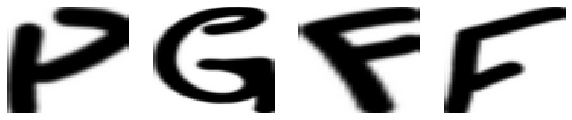

In [45]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, x_train, y_train):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')

## reshaping the arrays to train (flatining images)

In [46]:
x_train = x_train.reshape((len(x_train),-1))
x_test = x_test.reshape((len(x_test),-1))

# Training and testing our model

In [47]:
from sklearn.svm import SVC
classifier = SVC(gamma=0.0001,C=10)
classifier.fit(x_train,y_train)

SVC(C=10, gamma=0.0001)

In [48]:
y_pred = classifier.predict(x_test)

## Checking accuracy and confusion matrix for our model 

In [49]:
from sklearn.metrics import accuracy_score,classification_report
print(accuracy_score(y_test,y_pred))

0.9475524475524476


In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00        20
           B       0.82      1.00      0.90         9
           C       1.00      1.00      1.00         9
           D       0.91      1.00      0.95        10
           E       1.00      1.00      1.00        11
           F       0.92      1.00      0.96        12
           G       1.00      0.88      0.93         8
           H       0.88      1.00      0.93        14
           I       1.00      0.88      0.93        16
           J       0.92      1.00      0.96        11
           K       1.00      0.91      0.95        11
           L       0.92      0.92      0.92        12
           M       1.00      1.00      1.00         5
           N       1.00      1.00      1.00         9
           O       1.00      1.00      1.00        13
           P       1.00      1.00      1.00         2
           Q       0.88      0.78      0.82         9
           R       1.00    